# Importing libraries and data

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('vaccination_all_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.139200e+04,5.139200e+04,51392.000000,5.139200e+04,51392.000000,51392.000000
mean,1.368352e+18,9.821734e+04,1317.481087,1.557942e+04,3.111652,13.440886
std,9.434274e+15,8.288480e+05,5790.473165,4.342808e+04,52.019714,198.096124
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.364518e+18,1.170000e+02,147.000000,3.730000e+02,0.000000,0.000000
50%,1.369941e+18,5.670000e+02,422.000000,2.226000e+03,0.000000,1.000000
75%,1.375333e+18,2.595000e+03,1215.000000,1.155800e+04,1.000000,3.000000
max,1.380438e+18,1.491979e+07,380428.000000,1.205878e+06,7695.000000,22815.000000


In [5]:
df.info

<bound method DataFrame.info of                         id                           user_name  \
0      1340539111971516416                          Rachel Roh   
1      1338158543359250433                         Albert Fong   
2      1337858199140118533                            eli🇱🇹🇪🇺👌   
3      1337855739918835717                       Charles Adler   
4      1337854064604966912                Citizen News Channel   
5      1337852648389832708                                 Dee   
6      1337851215875608579                   Gunther Fehlinger   
7      1337850832256176136                 Dr.Krutika Kuppalli   
8      1337850023531347969                         Erin Despas   
9      1337842295857623042                        Ch.Amjad Ali   
10     1337841934170255365                         Tamer Yazar   
11     1337840331522453507                              VoiceM   
12     1337815730486702087                                WION   
13     1337809196453081088                 D

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

## Dropping duplicates

In [7]:
df = df.drop_duplicates('text')

In [8]:
df.isna().sum()

id                      0
user_name               0
user_location       11669
user_description     3478
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            11085
source                116
retweets                0
favorites               0
is_retweet              0
dtype: int64

## Removing missing values

In [91]:
df.dropna(inplace=True)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [92]:
df.isna().sum()

level_0             0
index               0
id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
subjectivity        0
polarity            0
sentiment           0
dtype: int64

In [93]:
df['user_location'].value_counts()

India                                 1035
Toronto, Canada  and Worldwide         733
New Delhi, India                       434
United States                          410
Beijing, China                         383
London, England                        319
Beijing                                311
Mumbai, India                          271
London                                 264
New Delhi                              210
USA                                    176
United Kingdom                         171
Moscow, Russia                         150
Los Angeles, CA                        149
Moscow, Russia                         148
New York, NY                           146
Canada                                 144
Malaysia                               143
Türkiye                                140
Washington, DC                         139
Pakistan                               133
Hong Kong                              126
Beijing, China                         124
Mumbai     

In [94]:
df['user_description'].value_counts()

George Tsanis – Workout Solutions Health and Fitness Consultants since 1996 – One-on-one and online distance coaching – Toronto, Canada, World                       733
Latest business news and valuable information from China.                                                                                                            189
Official Twitter account of Ilke News Agency /                                                                                                                       139
The largest newspaper in China                                                                                                                                       119
| political | cats | bikes | civil rights | tech | photography                                                                                                       105
News, views and up-to-date reports from Malaysia's premier news source. All that and more at https://t.co/S8jbx5pMaF                                       

In [95]:
df['hashtags'].value_counts()

['Moderna']                                                                                         2019
['Covaxin']                                                                                         1275
['SputnikV']                                                                                        1213
['PfizerBioNTech']                                                                                   674
['COVID19']                                                                                          600
['moderna']                                                                                          502
['OxfordAstraZeneca']                                                                                477
['Sinopharm']                                                                                        312
['Sinovac']                                                                                          294
['COVAXIN']                                            

In [96]:
df['source'].value_counts()

Twitter Web App                    9373
Twitter for iPhone                 8858
Twitter for Android                7364
TweetDeck                          1425
Twitter for iPad                    685
Instagram                           615
Hootsuite Inc.                      330
Buffer                              142
Twitter Media Studio                139
IFTTT                                91
Sprout Social                        68
Hocalwire Social Share               64
WordPress.com                        56
LinkedIn                             48
Twitter Media Studio - LiveCut       32
Twitter for Mac                      30
IndiaPost                            29
SocialFlow                           27
Tweetbot for iΟS                     25
dlvr.it                              24
Sprinklr                             23
Smarp.                               21
Twidere for Android                  21
Tumblr                               20
Blog2Social APP                      19


# Text cleaning

## function to clean the text

In [97]:
def clean_data(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    
    return text

In [98]:
df['text'] = df['text'].apply(clean_data)
df.head()

,level_0,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,...,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
0,14973,15503,1365047706461339655,Minette,South Africa,Children - Animals - Music - Avid reader - Po...,2013-02-21 03:24:40,430,18,57852,...,2021-02-25 21:15:09,hopefully waiting for my southafrica to order...,"['SouthAfrica', 'SputnikV', 'Russia']",Twitter for Android,0,0,False,0.0,0.0,Neutral
1,8766,32714,1372838248402325505,🌎 Sarwar 🌐,E,W pirsarwarras,2009-07-01 00:18:11,1751,1469,6498,...,2021-03-19 09:11:59,"russia's rdif, india's stelis biopharma to joi...","['Russia', 'India', 'SputnikV', 'Sputnik', 'Br...",Twitter Web App,0,0,False,0.0,0.0,Neutral
2,8767,39977,1376360965965541377,China Economy,Beijing,Latest business news and valuable information ...,2019-12-31 06:11:12,2294,144,535,...,2021-03-29 02:30:00,"china's sinopharm, announced on mar. 25 the of...","['China', 'Sinopharm']",Twitter Web App,4,4,False,0.0,0.0,Neutral
3,8768,39968,1376396516110163974,Georgia Tolley,"Dubai, United Arab Emirates",Writer & broadcaster based in #Dubai 🌴 Reporte...,2009-02-07 17:02:03,1101,1318,1950,...,2021-03-29 04:51:16,uae already making sinopharm vaccine 💉,"['UAE', 'Sinopharm']",Twitter for iPhone,0,0,False,0.0,0.0,Neutral
4,8769,39967,1376398973271937025,Faisal ∀meer Malik,"Dubai, United Arab Emirates","a very personal account & opinions,all disclai...",2016-04-27 14:19:45,2540,5000,52453,...,2021-03-29 05:01:02,sinopharm to manufacture in uae,['Sinopharm'],Twitter for Android,2,2,False,0.0,0.0,Neutral


## Wordcloud - most frequent words

(-0.5, 999.5, 499.5, -0.5)

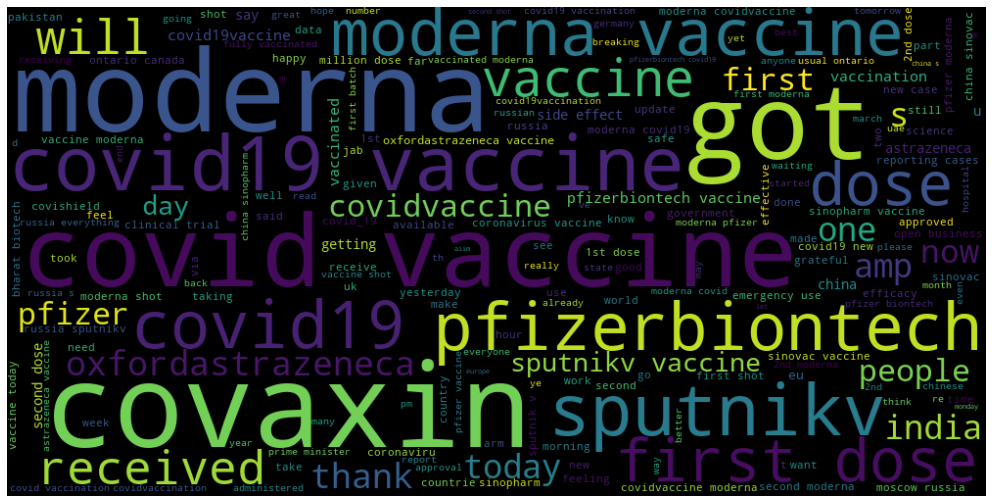

In [99]:
words = ' '.join([word for word in df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(18,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

Now we have an idea of the most frequent words in the corpus, it seems that moderna, covid, got, vaccine, covaxin are way more present than the others

# Testing TextBlob for sentiment analysis

In [100]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Subjectivity, polarity, sentiment

In [101]:
df['subjectivity'] = df['text'].apply(get_subjectivity)
df['polarity'] = df['text'].apply(get_polarity)
df['sentiment'] = df['polarity'].apply(get_sentiment)
df.head()

,level_0,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,...,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
0,14973,15503,1365047706461339655,Minette,South Africa,Children - Animals - Music - Avid reader - Po...,2013-02-21 03:24:40,430,18,57852,...,2021-02-25 21:15:09,hopefully waiting for my southafrica to order...,"['SouthAfrica', 'SputnikV', 'Russia']",Twitter for Android,0,0,False,0.0,0.0,Neutral
1,8766,32714,1372838248402325505,🌎 Sarwar 🌐,E,W pirsarwarras,2009-07-01 00:18:11,1751,1469,6498,...,2021-03-19 09:11:59,"russia's rdif, india's stelis biopharma to joi...","['Russia', 'India', 'SputnikV', 'Sputnik', 'Br...",Twitter Web App,0,0,False,0.0,0.0,Neutral
2,8767,39977,1376360965965541377,China Economy,Beijing,Latest business news and valuable information ...,2019-12-31 06:11:12,2294,144,535,...,2021-03-29 02:30:00,"china's sinopharm, announced on mar. 25 the of...","['China', 'Sinopharm']",Twitter Web App,4,4,False,0.0,0.0,Neutral
3,8768,39968,1376396516110163974,Georgia Tolley,"Dubai, United Arab Emirates",Writer & broadcaster based in #Dubai 🌴 Reporte...,2009-02-07 17:02:03,1101,1318,1950,...,2021-03-29 04:51:16,uae already making sinopharm vaccine 💉,"['UAE', 'Sinopharm']",Twitter for iPhone,0,0,False,0.0,0.0,Neutral
4,8769,39967,1376398973271937025,Faisal ∀meer Malik,"Dubai, United Arab Emirates","a very personal account & opinions,all disclai...",2016-04-27 14:19:45,2540,5000,52453,...,2021-03-29 05:01:02,sinopharm to manufacture in uae,['Sinopharm'],Twitter for Android,2,2,False,0.0,0.0,Neutral


# Visualization

Text(0.5, 0, 'Polarity')

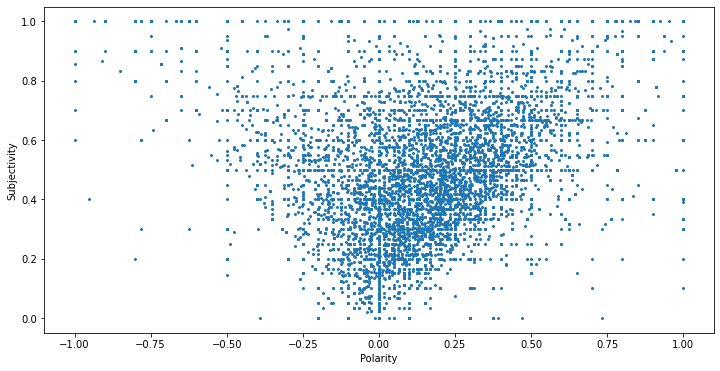

In [102]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df['polarity'], df['subjectivity'], s=4)

plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

In [103]:
df.columns

Index(['level_0', 'index', 'id', 'user_name', 'user_location',
       'user_description', 'user_created', 'user_followers', 'user_friends',
       'user_favourites', 'user_verified', 'date', 'text', 'hashtags',
       'source', 'retweets', 'favorites', 'is_retweet', 'subjectivity',
       'polarity', 'sentiment'],
      dtype='object')

In [104]:
df.sort_values('polarity', inplace=True)
df

,level_0,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,...,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
29336,22,17049,1366067659893321731,Apneet,"Brooklyn, NY",she/her • nyc • social media manager https://t...,2009-07-03 10:08:58,934,202,1550,...,2021-02-28 16:48:05,moderna side effects were terrible head aches ...,['Moderna'],Twitter for iPhone,0,0,False,1.000000,-1.0,Negative
29345,10,33224,1372957792777039874,COSmama,"Colorado, USA","mom of 2, Girl Scouts, engineering, love 🐈 🐕 #...",2015-06-03 21:55:28,254,699,39794,...,2021-03-19 17:07:00,fully vaccinated and praying 🧎 for all those l...,"['Moderna', 'vaccination', '2nddose', 'GetTheS...",Twitter for iPhone,0,1,False,1.000000,-1.0,Negative
29344,12,37988,1375314663768924168,Tom Farnan,"Los Angeles, CA,",Actor. Comedian. Commuter.,2011-05-07 01:21:05,458,1224,5822,...,2021-03-26 05:12:22,can’t wait to have that boring conversation at...,"['vaccines', 'shotsandshots']",Twitter for iPhone,0,0,False,1.000000,-1.0,Negative
29343,13,32108,1372631207997972481,William,"San Francisco, CA",The Deadline for Complaints Was Yesterday!!!,2013-02-02 22:17:48,156,136,5899,...,2021-03-18 19:29:16,of course send the faulty vaccines to your ne...,"['vaccines', 'JnJ', 'Moderna', 'PfizerVaccine']",Twitter for iPhone,0,0,False,1.000000,-1.0,Negative
29342,16,31651,1372163607648210948,Dafydd L Thomas,UK/Europe/Worldwide,Business Consultant & Graphic Artist.,2010-12-06 14:36:36,48,638,2289,...,2021-03-17 12:31:12,"come on eu countries get your ^%%^%^ together,...","['EU', 'countries', 'COVID19']",Twitter Web App,0,0,False,1.000000,-1.0,Negative
29341,30,30307,1371831209270112261,Jason Yun,"Columbus, OH",Your light environment is more important than ...,2008-08-16 02:45:39,2718,2359,374,...,2021-03-16 14:30:22,moderna is simply evil. if kids don't die fro...,['Moderna'],Twitter Web App,0,0,False,1.000000,-1.0,Negative
29340,18,27299,1370718547639480320,MarineBrat💀🖤,"Ohio, USA",#Progressive \n♡Cleveland & Baltimore Love♡\n\...,2018-08-18 00:07:04,1331,3300,93876,...,2021-03-13 12:49:03,we are on day 3 of the worst headache of my li...,"['moderna', 'CovidVaccine']",Twitter for Android,0,1,False,1.000000,-1.0,Negative
29339,19,27482,1370452805681614851,Dreams2Reality,The Chi,I don't believe in luck good or bad. I create ...,2011-08-23 15:51:13,133,767,6953,...,2021-03-12 19:13:05,1/2 way vaccinated..arm soreness was the worst...,['vaccine'],Instagram,0,0,False,1.000000,-1.0,Negative
29338,20,3780,1350482375185113088,Sangam Ekka,Gwalior||Delhi||Jashpur,I've too many tabs to open\nभारतीय\n|Student||...,2018-12-15 23:51:53,58,198,2709,...,2021-01-16 16:37:43,death of 23 people's in norway after receiving...,"['Norway', 'PfizerBioNTech']",Twitter for Android,0,1,False,1.000000,-1.0,Negative
29369,32,29906,1372088504591781888,Flaminia,France,Une autorité exorbitante donnée tout à coup à ...,2017-03-04 14:21:48,98,41,3215,...,2021-03-17 07:32:46,terrible 😱 moderna vaccinationcovid,"['Moderna', 'VaccinationCovid']",Twitter for Android,0,1,False,1.000000,-1.0,Negative


<AxesSubplot:>

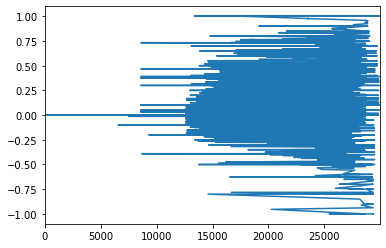

In [105]:
df['polarity'].plot()

In [106]:
df.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

<AxesSubplot:>

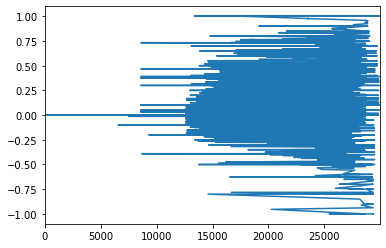

In [107]:
df['polarity'].plot()

Here we can see the polarity of most of the values

In [108]:
df.sort_values('subjectivity', inplace=True)
df

,level_0,index,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,...,date,text,hashtags,source,retweets,favorites,is_retweet,subjectivity,polarity,sentiment
8490,17676,45192,1380019162584657923,Katie Angelo-McFadden; AKA GaGa to my grandson 💙,"Michigan, USA",Owner of Angelo's Salon Spa LLC #angelossalons...,2009-03-07 03:50:16,4478,4524,9745,...,2021-04-08 04:46:22,had my 2 jab of moderna.,['Moderna'],Twitter for iPad,0,2,False,0.0,0.00,Neutral
516,8246,29070,1371535371562057731,Eggy Morales 👑,NYC Born & Brooklyn Raised!,"Cigars, Photos & Sports!\nFollow https://t.co/...",2011-01-04 22:35:37,751,3536,4502,...,2021-03-15 18:54:49,2021 has us with vaccine cards like we trading...,"['Vaccine', 'Moderna']",Twitter for Android,0,2,False,0.0,0.00,Neutral
515,8245,38222,1375083819389366280,Chuck Gates,"Richmond, VA","Husband, dad, #LDS, JD, communicator, advocate...",2009-06-24 17:38:23,832,1798,2853,...,2021-03-25 13:55:05,🥳 got the fauciouchie 💉 today at ! \n💪 💉💪💉💪\nt...,"['FauciOuchie', 'Virginia']",Twitter for Android,0,0,False,0.0,0.00,Neutral
521,8251,29054,1371543211257204736,Jack Galanty 🏳️‍🌈,"Culver City, CA","I love Halloween, Disney, Set Design, & Theme ...",2012-01-10 15:56:09,302,346,75352,...,2021-03-15 19:25:58,got my moderna vaccine appointment for next mo...,"['Moderna', 'COVID19Vaccine', 'VaccinateAll58'...",Twitter Web App,0,5,False,0.0,0.00,Neutral
513,8243,29045,1371547488197414916,🌪 SnowStormYOU!Ⓥ🌪 🌊🌱,AMERICA,Vegan Democrat 🚫 big $ in govt! #EndCitizensUn...,2016-12-31 17:41:05,13686,14213,178917,...,2021-03-15 19:42:57,moderna begins testing next-generation coronav...,"['COVID19', 'Moderna']",Twitter Web App,0,1,False,0.0,0.00,Neutral
530,8260,29119,1371501508991258626,Blaise HATT-ARNOLD,"Genève, Suisse","About the economy, entrepreneurship, finance a...",2009-09-15 18:21:27,589,288,554,...,2021-03-15 16:40:15,swiss drugs regulator swissmedic grants licens...,"['Swiss', 'Swissmedic', 'Lonza']",Twitter for iPhone,0,1,False,0.0,0.00,Neutral
532,8240,29042,1371549075213066241,Jim Rotan ☕️ ☁️☁️ 🥃,"ÜT: 38.861499,-76.775228",Cloud Security Architect @sapariba | Previous ...,2008-09-20 19:44:07,57,357,1247,...,2021-03-15 19:49:16,1st covid shot completed (moderna). getvaccin...,"['GetVaccinated', 'COVID19Vaccination', 'Moder...",Twitter for iPhone,0,0,False,0.0,0.00,Neutral
546,8262,38287,1374936202084769797,Tom Kroeger 🇺🇸🇵🇭🇩🇪🇸🇪,"Twin Cities, Minnesota",/ #ITeachMath / #ITeachESL / #AdultEdu-cator /...,2012-03-19 17:45:57,213,356,6065,...,2021-03-25 04:08:30,got my 2nd moderna jab on monday. tuesday felt...,['Moderna'],Twitter for Android,0,2,False,0.0,0.00,Neutral
545,8224,38182,1375115943240736773,UNC Health,"Chapel Hill, NC",UNC Health is proactively focused on healthy-b...,2008-11-21 20:58:10,32960,1416,7034,...,2021-03-25 16:02:43,dr. david wohl is featured in this article ab...,['COVID19'],Hootsuite Inc.,0,0,False,0.0,0.00,Neutral
544,8223,29107,1371513528872472578,vince #FBPE #ABTV #WATON #loveNHS #rejoineu,Uk,"Remainer, Supports publicly run NHS",2015-10-10 17:03:55,2093,3362,14931,...,2021-03-15 17:28:01,pfizer moderna are just profiteers.,"['pfizer', 'moderna']",Twitter for Android,0,1,False,0.0,0.00,Neutral


In [109]:
df.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

<AxesSubplot:>

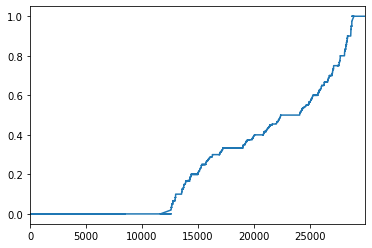

In [110]:
df['subjectivity'].plot()

Here we can see the distribution of the subjectivity

In [111]:
df_train = df[['text', 'sentiment']]

In [112]:
df_train

,text,sentiment
8490,had my 2 jab of moderna.,Neutral
516,2021 has us with vaccine cards like we trading...,Neutral
515,🥳 got the fauciouchie 💉 today at ! \n💪 💉💪💉💪\nt...,Neutral
521,got my moderna vaccine appointment for next mo...,Neutral
513,moderna begins testing next-generation coronav...,Neutral
530,swiss drugs regulator swissmedic grants licens...,Neutral
532,1st covid shot completed (moderna). getvaccin...,Neutral
546,got my 2nd moderna jab on monday. tuesday felt...,Neutral
545,dr. david wohl is featured in this article ab...,Neutral
544,pfizer moderna are just profiteers.,Neutral


In [113]:
type(df_train)

pandas.core.frame.DataFrame

In [114]:
print(df_train['text'].loc[[1]])

1    russia's rdif, india's stelis biopharma to joi...
Name: text, dtype: object


# Building the model

## Splitting the data

In [115]:
import numpy as np
import tensorflow as tf

labels = np.array(df_train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(1)
    if labels[i] == 'Positive':
        y.append(2)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")



In [116]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train['text'])
sequences = tokenizer.texts_to_sequences(df_train['text'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   78    3    5]
 [   0    0    0 ...   12   11    5]
 [   0    0    0 ...  799 3205  835]
 ...
 [   0    0    0 ...  441  336   20]
 [   0    0    0 ...   36   28 1234]
 [   0    0    0 ...   92   23  647]]


In [117]:
X = tweets
#y = df_train['sentiment']
X

array([[   0,    0,    0, ...,   78,    3,    5],
       [   0,    0,    0, ...,   12,   11,    5],
       [   0,    0,    0, ...,  799, 3205,  835],
       ...,
       [   0,    0,    0, ...,  441,  336,   20],
       [   0,    0,    0, ...,   36,   28, 1234],
       [   0,    0,    0, ...,   92,   23,  647]], dtype=int32)

In [118]:
X.shape

(29947, 200)

In [119]:
y.shape

(29947,)

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=12,test_size=0.3)


In [130]:
x_test.shape

(8985, 200)

In [131]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [132]:
y_train.shape

(20962, 3)

In [133]:
x_train.shape

(20962, 200)

In [134]:
x_train

array([[   0,    0,    0, ...,   30, 1163,    5],
       [   0,    0,    0, ...,   10,  295,    1],
       [   0,    0,    0, ...,  569, 1104,    5],
       ...,
       [   0,    0,    0, ...,  136,   80,  322],
       [   0,    0,    0, ...,    3,  713,   13],
       [   0,    0,    0, ...,    4,  310, 1493]], dtype=int32)

In [135]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [136]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

X_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen=256)

In [137]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(20,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


es = EarlyStopping(patience=5, restore_best_weights=True)
history = model1.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9697 - accuracy: 0.4758 - val_loss: 0.9808 - val_accuracy: 0.4772
Epoch 2/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9568 - accuracy: 0.4844 - val_loss: 0.9484 - val_accuracy: 0.4894
Epoch 3/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9475 - accuracy: 0.4882 - val_loss: 0.9477 - val_accuracy: 0.4928
Epoch 4/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9447 - accuracy: 0.4914 - val_loss: 0.9495 - val_accuracy: 0.4934
Epoch 5/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9427 - accuracy: 0.4917 - val_loss: 0.9474 - val_accuracy: 0.4913
Epoch 6/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9476 - accuracy: 0.4878 - val_loss: 0.9504 - val_accuracy: 0.4896
Epoch 7/10
1311/1311 [==============================] - 64s 49ms/step - loss: 0.9471 - accuracy: 0.4882 - val_loss: 0.9483 -

In [138]:
var = model1.predict(X_test)
var

array([[0.4916222 , 0.08899054, 0.41938725],
       [0.49162233, 0.08899036, 0.41938728],
       [0.4916228 , 0.08898977, 0.41938746],
       ...,
       [0.49162212, 0.08899064, 0.41938725],
       [0.4916222 , 0.08899051, 0.4193872 ],
       [0.49162194, 0.08899095, 0.4193872 ]], dtype=float32)

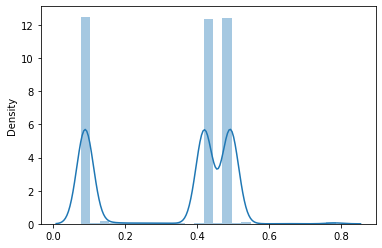

In [139]:
import seaborn as sns
sns.distplot(var)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Plotting our performance

In [140]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


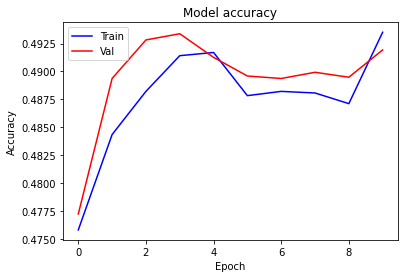

In [141]:
plt.plot(accuracy, 'b')
plt.plot(val_accuracy, 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

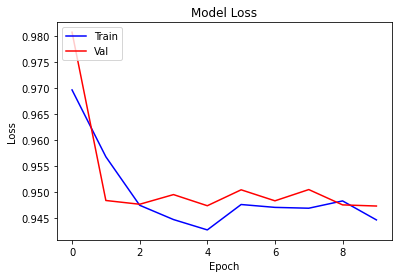

In [142]:
plt.plot(loss, 'b')
plt.plot(val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

We tried single LSTM, Bidirectional LSTM, and One-Dimensional Convolutional Neural Network, and with any of these models we got a good accuracy score. At this point we can say that this dataset is not good enough for performing a proper prediction on sentiment analysis tweets